In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from IPython.core.display import Image
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import graphviz
import pydot
import io



In [2]:
success_feature= pd.read_csv('./success_link_feature.csv',index_col=0)
fail_feature = pd.read_csv('./fail_link_feature.csv',index_col=0)
success_feature


,money,pledged_money,creator,backers,Number of projects opened,Producer area,genre,Support amount list,The highest amount of support,The minimum amount of support,Total number of support steps,List of supporters,Maximum amount of sponsors,Minimum amount of sponsors,label
0,652995,80000,Steve Jackson Games,"3,936",25,"Austin, TX",Tabletop Games,"[51, 75, 100, 140, 200, 300, 1000, 1250, 50, 7...",1250,50,14,"['24', '312', '2', '650', '54', '11', '1', '4'...",4,9,success
1,409150,400000,Corey Cole,"6,093",3,"San Francisco, CA",Video Games,"[5, 20, 35, 50, 65, 75, 100, 125, 150, 175, 20...",7500,5,20,"['69', '3,299', '893', '599', '156', '284', '1...",2,69,success
2,451511,400000,68 Voces,285,0,"Mexico City, Mexico",Animation,"[150, 250, 500, 1000, 1500, 3000, 5000, 10000,...",100000,150,11,"['55', '51', '77', '19', '21', '18', '2', '0',...",2,55,success
3,50473,49000,Shawn Alexander Allen,"1,249",2,"New York, NY",Video Games,"[15, 25, 30, 35, 40, 50, 59, 64, 72, 85, 109, ...",5000,10,25,"['331', '134', '61', '81', '20', '34', '17', '...",0,100,success
4,48081,20000,Chen Bikovski,299,2,"Tel Aviv-Yafo, Israel",Product Design,"[5, 15, 35, 130, 180, 250, 280, 300, 325, 10000]",10000,5,10,"['12', '8', '11', '149', '62', '0', '2', '11',...",0,12,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,35817,35000,Melanie Nead,276,0,"Portland, OR",Textiles,"[8, 10, 10, 20, 28, 45, 55, 90, 160, 225, 325,...",10000,8,24,"['6', '19', '30', '25', '37', '37', '33', '12'...",1,6,success
116,34372,25000,Marc Gaffen,522,0,"Los Angeles, CA",Graphic Novels,"[1, 15, 30, 40, 75, 100, 125, 220, 275, 800, 1...",2500,1,15,"['27', '91', '117', '126', '45', '11', '24', '...",0,27,success
117,3044,1500,Lisa Moore,132,2,"Tyler, TX",Comic Books,"[5, 18, 25, 35, 42, 45, 55, 85, 125, 155, 225]",225,5,11,"['57', '42', '11', '1', '8', '1', '2', '2', '1...",1,57,success
118,56484,48000,Glenn Fleishman,"1,467",8,"Seattle, WA",Nonfiction,"[10, 15, 25, 30, 35, 50, 60, 80, 100, 150, 200...",8000,10,19,"['168', '149', '140', '486', '24', '120', '36'...",0,168,success


In [3]:
df = pd.concat([success_feature, fail_feature],ignore_index=True)
df

,money,pledged_money,creator,backers,Number of projects opened,Producer area,genre,Support amount list,The highest amount of support,The minimum amount of support,Total number of support steps,List of supporters,Maximum amount of sponsors,Minimum amount of sponsors,label
0,652995,80000,Steve Jackson Games,"3,936",25,"Austin, TX",Tabletop Games,"[51, 75, 100, 140, 200, 300, 1000, 1250, 50, 7...",1250,50,14,"['24', '312', '2', '650', '54', '11', '1', '4'...",4,9,success
1,409150,400000,Corey Cole,"6,093",3,"San Francisco, CA",Video Games,"[5, 20, 35, 50, 65, 75, 100, 125, 150, 175, 20...",7500,5,20,"['69', '3,299', '893', '599', '156', '284', '1...",2,69,success
2,451511,400000,68 Voces,285,0,"Mexico City, Mexico",Animation,"[150, 250, 500, 1000, 1500, 3000, 5000, 10000,...",100000,150,11,"['55', '51', '77', '19', '21', '18', '2', '0',...",2,55,success
3,50473,49000,Shawn Alexander Allen,"1,249",2,"New York, NY",Video Games,"[15, 25, 30, 35, 40, 50, 59, 64, 72, 85, 109, ...",5000,10,25,"['331', '134', '61', '81', '20', '34', '17', '...",0,100,success
4,48081,20000,Chen Bikovski,299,2,"Tel Aviv-Yafo, Israel",Product Design,"[5, 15, 35, 130, 180, 250, 280, 300, 325, 10000]",10000,5,10,"['12', '8', '11', '149', '62', '0', '2', '11',...",0,12,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,1,35000,Nicholas Aiken,1,0,"Ridgefield, CT",Childrenswear,"[15, 50]",50,15,2,"['0', '0']",0,0,fail
233,790,35781,SASI Studio,8,0,"London, UK",Product Design,"[5, 15, 25, 39, 56, 74, 106]",106,5,7,"['0', '0', '0', '3', '0', '1', '3']",3,0,fail
234,2990,7151,didymoStrapS,32,0,"Barcelona, Spain",Accessories,"[60, 65, 70, 110, 110]",110,60,5,"['14', '1', '0', '6', '10']",6,14,fail
235,1,6169,Fade to Grey Films,1,0,"Southampton, UK",Drama,"[5, 35, 40, 75, 75, 100, 250, 300, 500, 1000, ...",2000,5,11,"['0', '0', '0', '0', '0', '0', '0', '0', '0', ...",0,0,fail


In [4]:
df = df[['backers','Number of projects opened','Total number of support steps','Maximum amount of sponsors','Minimum amount of sponsors','label']]

In [5]:
df_label= df[['label']]
df = df[['backers','Number of projects opened','Total number of support steps'
         ,'Maximum amount of sponsors','Minimum amount of sponsors']]

In [6]:
df_label['label'] = df_label['label'].astype(str)

In [7]:
df.dtypes
df=df.replace(',','',regex=True).astype(float)
df = df.astype(int)
df

,backers,Number of projects opened,Total number of support steps,Maximum amount of sponsors,Minimum amount of sponsors
0,3936,25,14,4,9
1,6093,3,20,2,69
2,285,0,11,2,55
3,1249,2,25,0,100
4,299,2,10,0,12
...,...,...,...,...,...
232,1,0,2,0,0
233,8,0,7,3,0
234,32,0,5,6,14
235,1,0,11,0,0


In [8]:
df.feature_names = df.columns
df.target_names = np.array(['fail', 'success'])
df.data = df.values
df.target = df_label.label

C:\Users\tlath\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\tlath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\tlath\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tlath\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.py

In [9]:
#학습과 테스트 데이터 세트로 분리
x_train, x_test, y_train,y_test = train_test_split(df,df_label,train_size = 0.8)

In [26]:
x_train

,backers,Number of projects opened,Total number of support steps,Maximum amount of sponsors,Minimum amount of sponsors
55,2275,4,14,1,9
20,12613,0,20,1,388
99,535,30,15,1,249
199,3,0,3,1,1
117,132,2,11,1,57
...,...,...,...,...,...
170,11,0,3,6,1
32,53643,3,4,4029,5575
230,10,0,7,0,9
15,328,5,15,4,13


In [11]:
# DecicionTreeClassifier 생성(max_depth = 5 으로 제한)
clf=tree.DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=0)

# DecisionTreeClassifier 학습
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [12]:
y_pred = clf.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9583333333333334


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fail       1.00      0.91      0.95        22
     success       0.93      1.00      0.96        26

    accuracy                           0.96        48
   macro avg       0.96      0.95      0.96        48
weighted avg       0.96      0.96      0.96        48



[Text(167.4, 199.32, 'X[0] <= 74.0\nentropy = 1.0\nsamples = 237\nvalue = [117, 120]'),
 Text(55.800000000000004, 163.07999999999998, 'X[3] <= 5.5\nentropy = 0.073\nsamples = 114\nvalue = [113, 1]'),
 Text(27.900000000000002, 126.83999999999999, 'entropy = 0.0\nsamples = 107\nvalue = [107, 0]'),
 Text(83.7, 126.83999999999999, 'X[2] <= 5.5\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(55.800000000000004, 90.6, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(111.60000000000001, 90.6, 'X[4] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(83.7, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(139.5, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 163.07999999999998, 'X[0] <= 195.5\nentropy = 0.207\nsamples = 123\nvalue = [4, 119]'),
 Text(251.10000000000002, 126.83999999999999, 'X[3] <= 6.5\nentropy = 0.89\nsamples = 13\nvalue = [4, 9]'),
 Text(223.20000000000002, 90.6, 'X[0] <= 184.0\nentropy = 0.684\nsampl

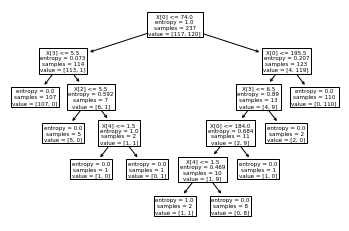

In [14]:
tree.plot_tree(clf.fit(df.data, df.target))

In [15]:
def plot_feature_importances(model):
    n_features=df.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),df.feature_names)
    plt.xlabel('importance_value')
    plt.ylabel('feature')
    plt.ylim(-1,n_features)

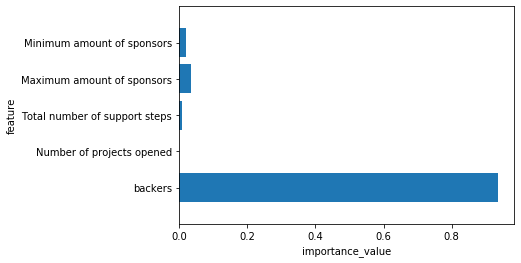

In [16]:
feature_importance_values = best_df_clf.feature_importances_
plot_feature_importances(clf)

In [21]:
importance = clf.feature_importances_
#0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 예측했다는 뜻

importance_list = list(zip(x_train.columns,importance))
sorted(importance_list, key=lambda x:x[1],reverse=True)

[('backers', 0.9361152622708552),
 ('Maximum amount of sponsors', 0.034810432035265744),
 ('Minimum amount of sponsors', 0.01995958596728418),
 ('Total number of support steps', 0.009114719726594818),
 ('Number of projects opened', 0.0)]

In [17]:
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(clf, out_file=dot_buf, feature_names=df.feature_names,
                    class_names=df.target_names, filled=True,rounded=True)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

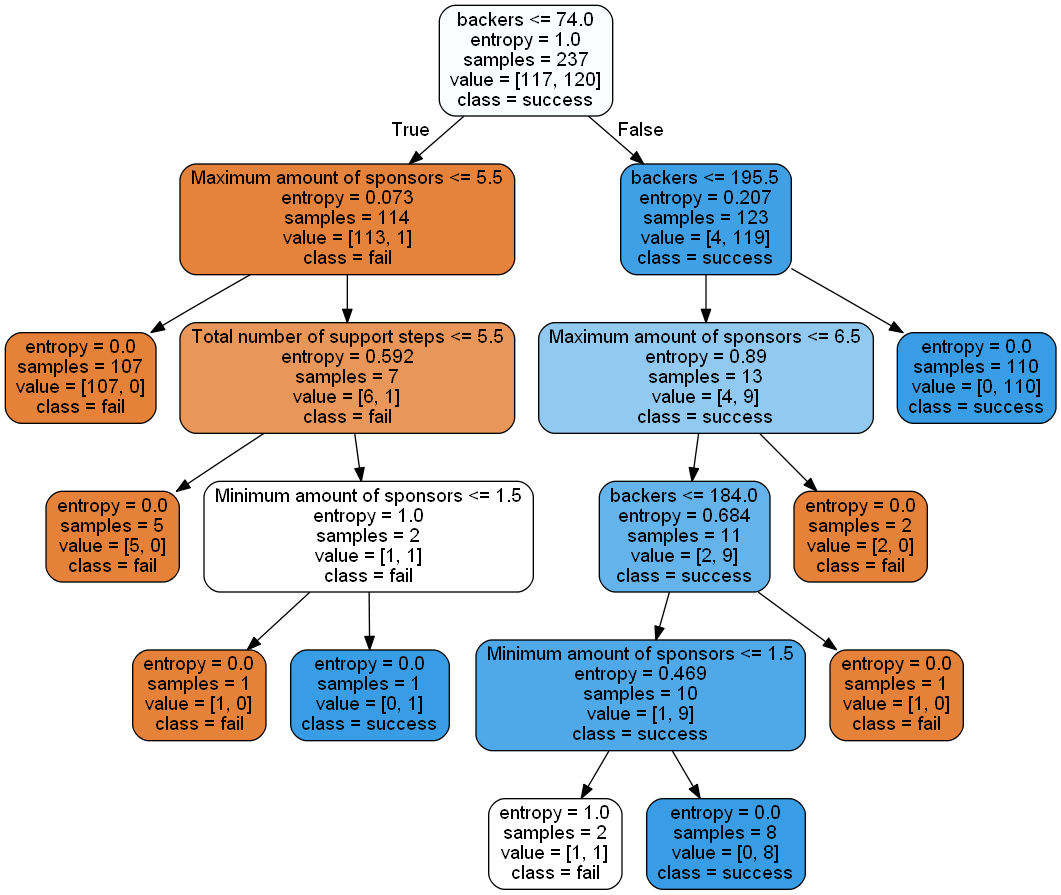

In [18]:
draw_decision_tree(clf)